# 한글및 마이너스 기호 깨짐 방지코드
- 실행후 런타임 다시시작 할 것!

In [10]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
DATA_PATH = "/content/drive/MyDrive/data/"

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통신사 고객 이탈 여부 데이터셋
- 이탈 여부 컬럼: 1(이탈), 0(이탈 안함)
- 성별 컬럼: 1(여성), 0(남성)
- 여부관련컬럼들: 1(yes), 0(no)
- 약정기간 컬럼: 0(약정없음), 1(1년약정), 2(2년약정)

In [14]:
df = pd.read_csv(f"{DATA_PATH}customer_train.csv")
df.shape

(4930, 21)

In [15]:
df.head()

,ID,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷이용방식,인터넷보안서비스사용여부,...,기기방화벽서비스사용여부,인터넷기술지원서비스사용여부,스트리밍TV여부,스트리밍영화여부,약정기간,지로여부,지불방법,한달요금,총지불요금,이탈여부
0,train_0,1,0,0,0,23,1,0,광,0,...,0,1,0,0,0,0,메일,79.10,1783.75,0
1,train_1,1,0,0,0,1,1,0,디지털,0,...,0,0,0,0,0,0,메일,45.40,45.40,1
2,train_2,0,0,0,0,23,1,1,광,0,...,1,1,1,1,0,0,메일,104.05,2470.10,1
3,train_3,1,0,0,0,11,1,0,디지털,0,...,1,1,0,1,1,1,신용카드,64.90,697.25,0
4,train_4,1,0,0,0,5,1,1,광,0,...,0,0,1,0,0,0,전자,85.20,474.80,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4930 non-null   object 
 1   성별              4930 non-null   int64  
 2   고령자여부           4930 non-null   int64  
 3   기혼여부            4930 non-null   int64  
 4   부양가족여부          4930 non-null   int64  
 5   가입기간            4930 non-null   int64  
 6   집전화이용여부         4930 non-null   int64  
 7   다중회선여부          4930 non-null   int64  
 8   인터넷이용방식         3859 non-null   object 
 9   인터넷보안서비스사용여부    4930 non-null   int64  
 10  인터넷백업서비스사용여부    4930 non-null   int64  
 11  기기방화벽서비스사용여부    4930 non-null   int64  
 12  인터넷기술지원서비스사용여부  4930 non-null   int64  
 13  스트리밍TV여부        4930 non-null   int64  
 14  스트리밍영화여부        4930 non-null   int64  
 15  약정기간            4930 non-null   int64  
 16  지로여부            4930 non-null   int64  
 17  지불방법            4930 non-null   o

- 결측치 처리

In [17]:
df["인터넷이용방식"] = df["인터넷이용방식"].fillna("UNK")
df.isnull().sum().sum()

0

In [18]:
df.nunique()

ID                4930
성별                   2
고령자여부                2
기혼여부                 2
부양가족여부               2
가입기간                73
집전화이용여부              2
다중회선여부               2
인터넷이용방식              3
인터넷보안서비스사용여부         2
인터넷백업서비스사용여부         2
기기방화벽서비스사용여부         2
인터넷기술지원서비스사용여부       2
스트리밍TV여부             2
스트리밍영화여부             2
약정기간                 3
지로여부                 2
지불방법                 4
한달요금              1432
총지불요금             4656
이탈여부                 2
dtype: int64

# Seaborn
- 내부적으로 matplotlib 를 호출하여 시각화하는 라이브러리
- 통계기반 plot를 손쉽게 시각화할 수 있다.
- 단순하게 임의의 데이터만 시각화해서 빠르게 보고 싶다면 matplotlib 활용
- 데이터프레임 기반의 통계를 사용한 시각화를 해보고 싶다면 seaborn 을 활용

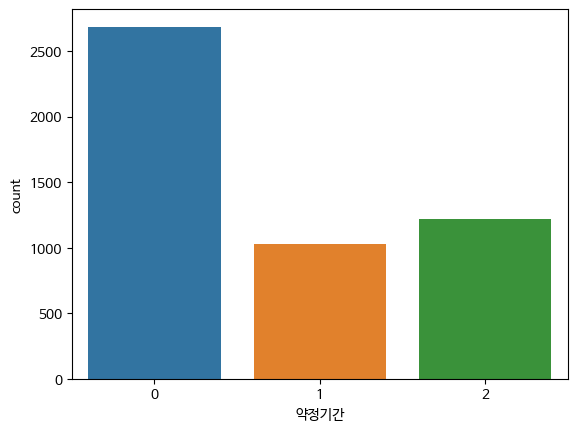

In [19]:
# 약정 기간별 카운팅을 하고 싶다면?
sns.countplot(data=df, x = "약정기간")
plt.show()

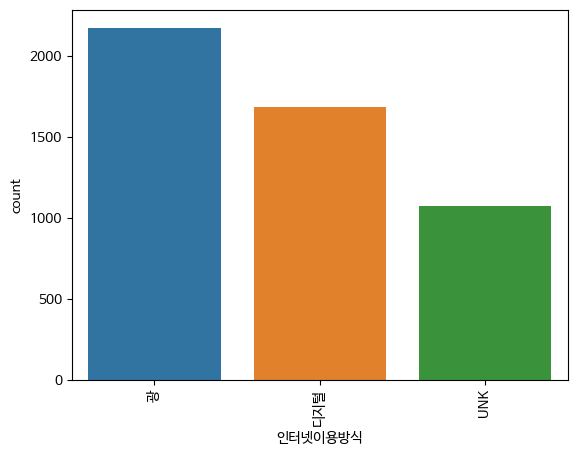

In [22]:
sns.countplot(data=df, x = "인터넷이용방식").tick_params(axis="x", labelrotation=90)
plt.show()

# seaborn 의 그래프 종류
- relational plots
    - 두변수의 관계를 볼 때
- distribution plots
    - 수치형 변수의 분포를 볼 때
- categorical plots
    - 범주형 변수의 집계 또는 범주형과 수치형의 관계를 볼 때

## relational plots

### lineplot
- 일반적으로 시간을 x 축에 두고 y 축에 추이를 볼 때 사용

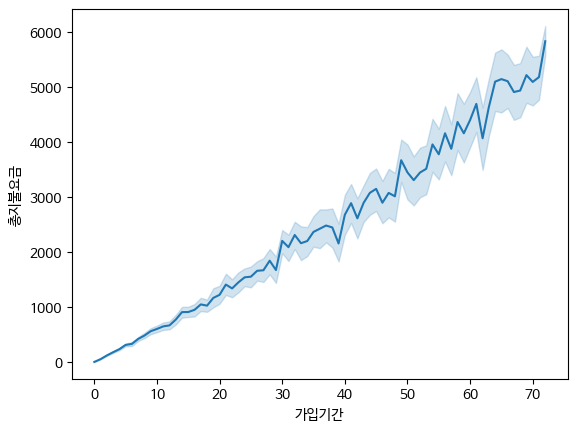

In [ ]:
# 기본적으로 lineplot 은 각 x 값에 대응되는 여러 y값들의 중심에 대한 추정치로 플롯을 그린다.
# 해당 추정선에 대한 신뢰구간도 같이 표시된다.
# 신뢰구간은 표본 통계량에서 파생되어 알 수 없는 모집단의 모수값들이 포함될 가능성이 있는 값의 범위를 의미
sns.lineplot(data=df, x = "가입기간", y="총지불요금")
plt.show()

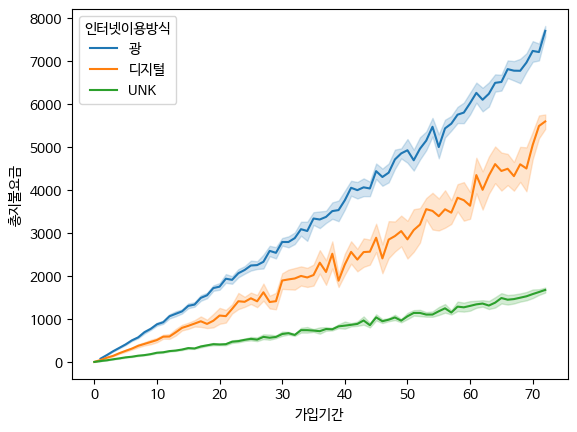

In [23]:
sns.lineplot(data=df, x="가입기간", y="총지불요금", hue="인터넷이용방식")
plt.show()

### scatterplot

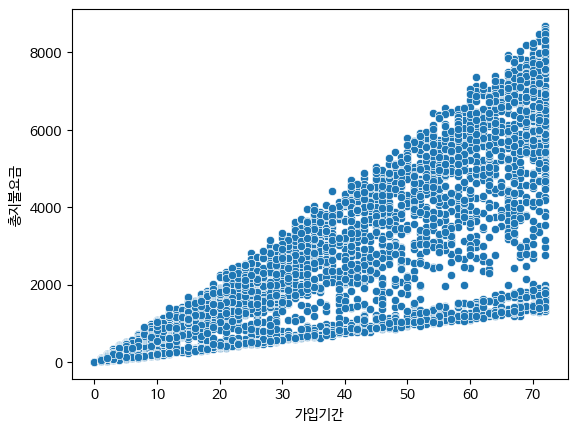

In [24]:
sns.scatterplot(x="가입기간", y="총지불요금", data=df)
plt.show()

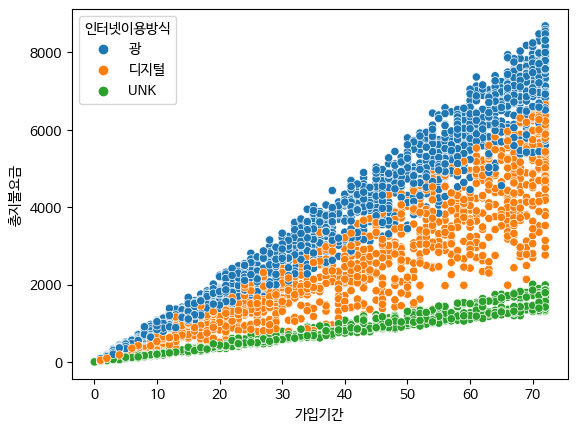

In [25]:
sns.scatterplot(x="가입기간", y="총지불요금", data=df,hue = "인터넷이용방식")
plt.show()

### relplot
- lineplot 과 scatterplot 을 모두 그릴수 있는 함수

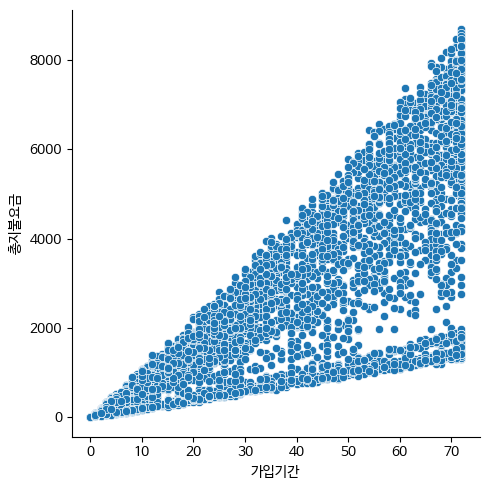

In [26]:
sns.relplot(x="가입기간",y="총지불요금", data=df)
plt.show()

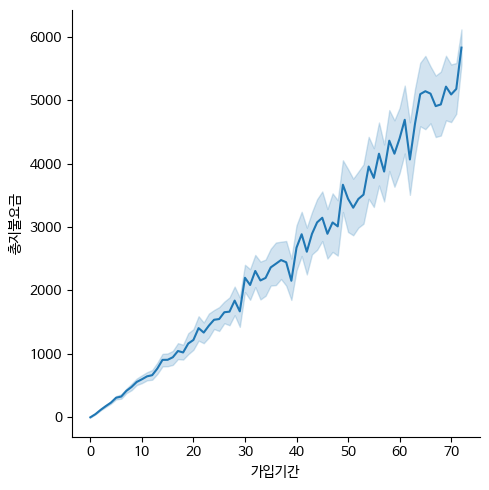

In [27]:
sns.relplot(x="가입기간",y="총지불요금", data=df,kind="line")
plt.show()

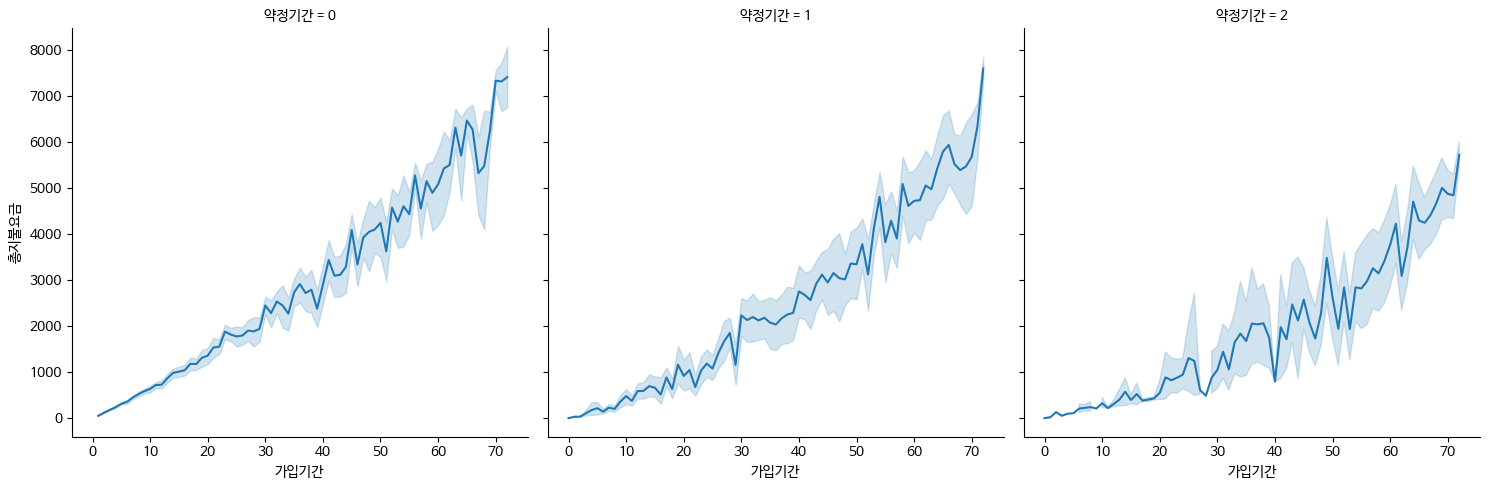

In [28]:
sns.relplot(x="가입기간",y="총지불요금", data=df,kind="line", col = "약정기간")
plt.show()

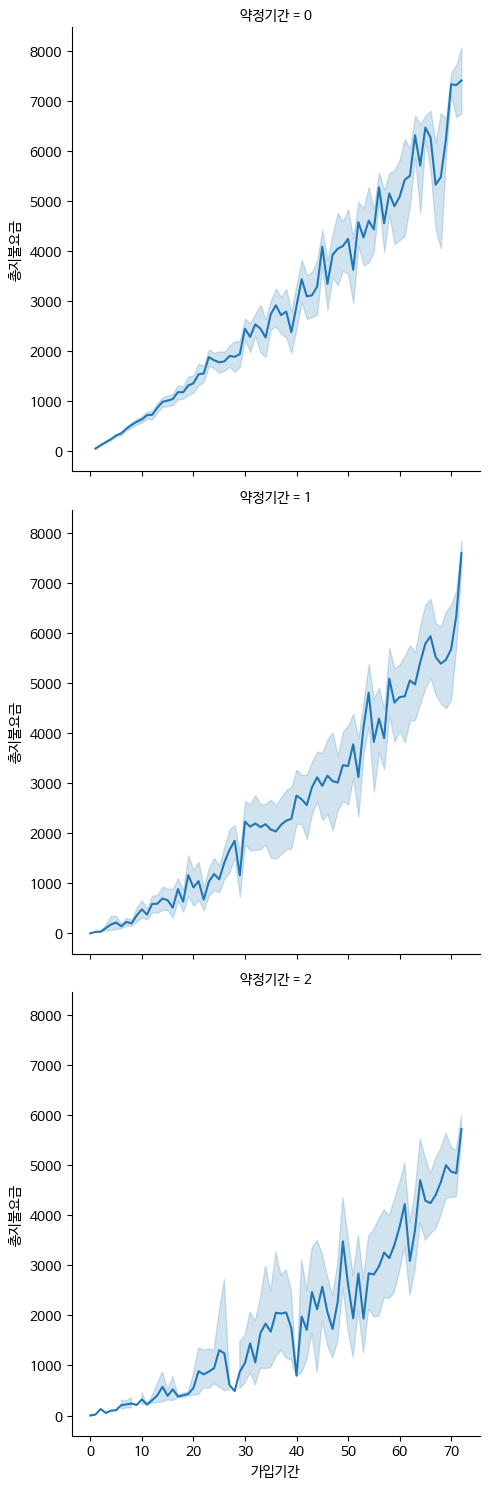

In [29]:
sns.relplot(x="가입기간",y="총지불요금", data=df,kind="line", row = "약정기간")
plt.show()

### lmplot
- 산점도와 추정 회귀선을 그려준다.
- 추정회귀선은 x 에 따른 y값의 변화를 가장 잘 설명하는 직선

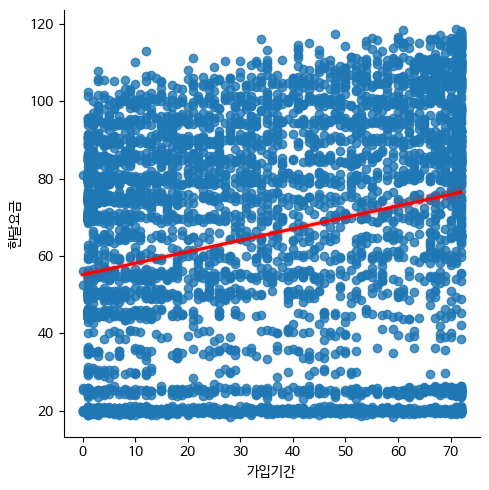

In [30]:
sns.lmplot(x="가입기간", y="한달요금", data=df, line_kws={"color":"red"})
plt.show()

### heatmap

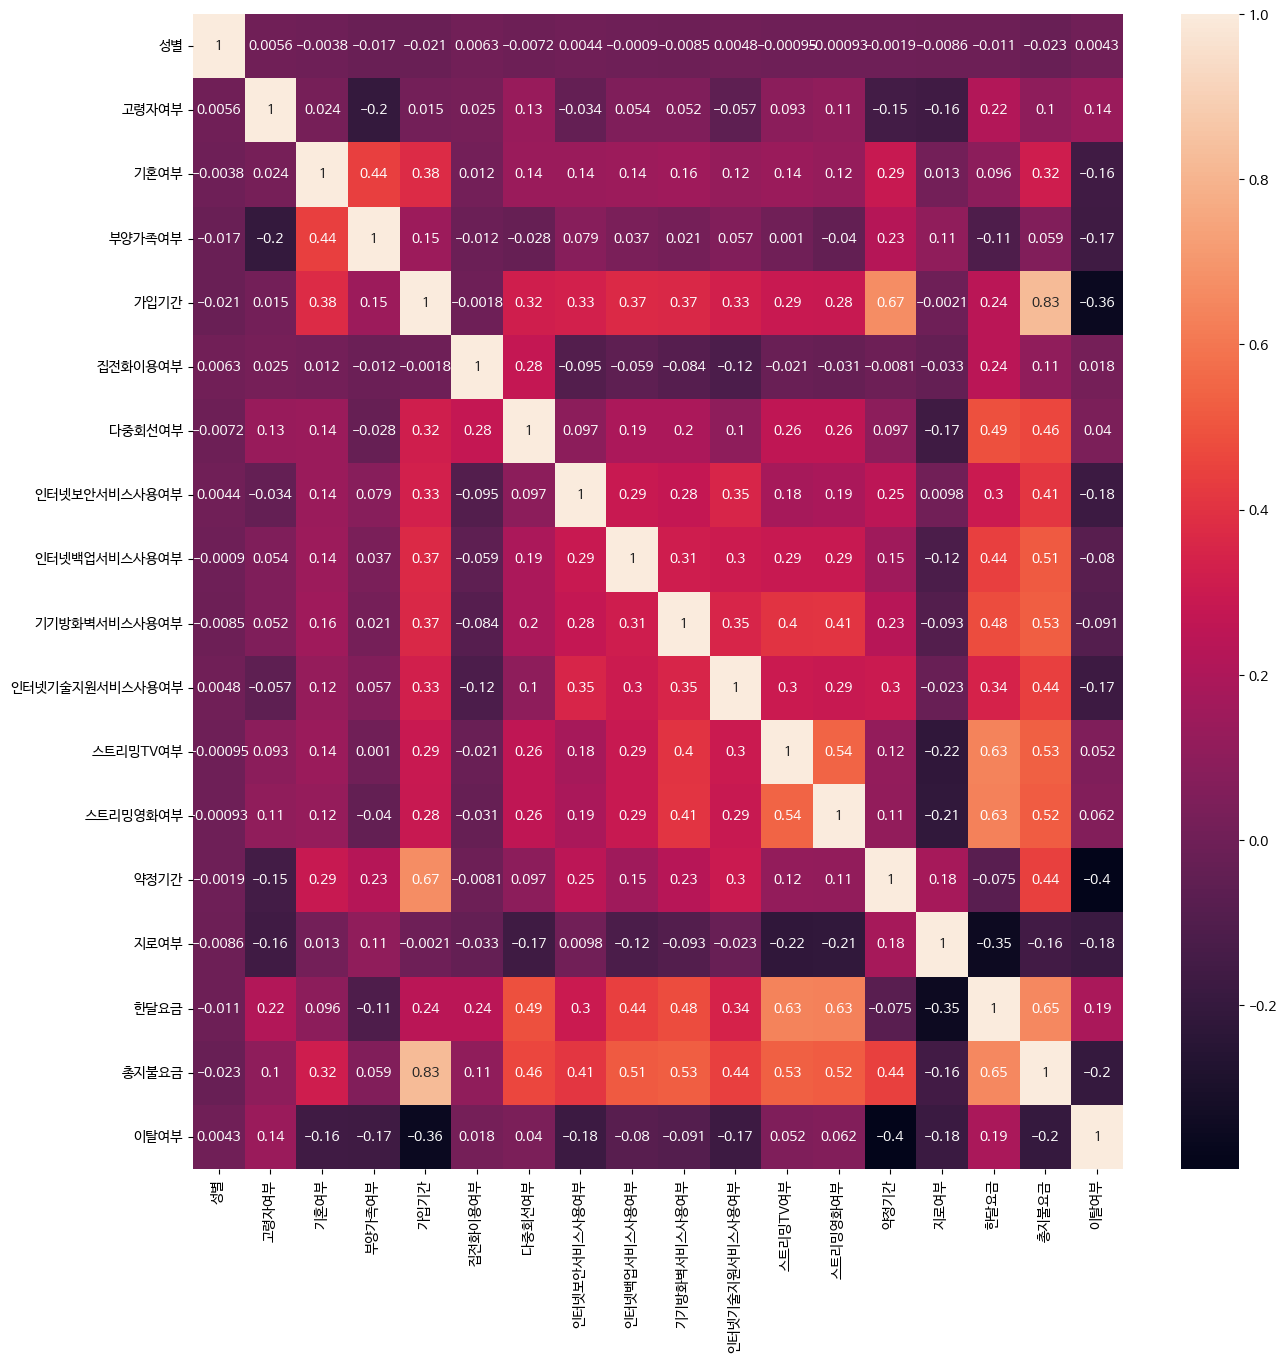

In [31]:
fig, ax = plt.subplots(figsize=[15,15])
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)
plt.show()

### pairplot
- 서로 다른 변수간에는 산점도를 그려준다.
- 대각선 방향으로는 히스토그램을 그려준다.

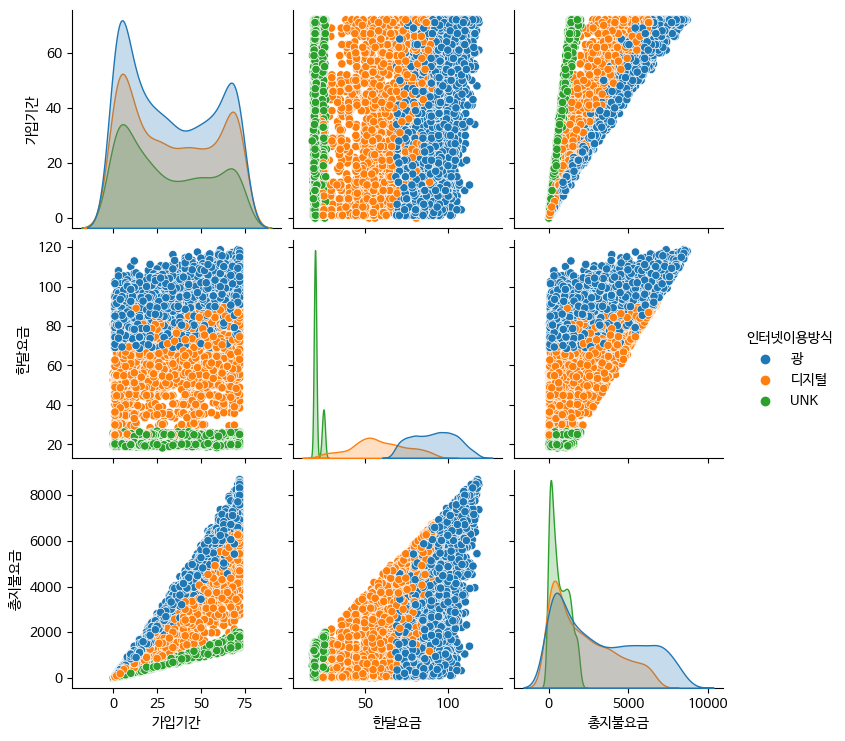

In [32]:
cols = ["가입기간","한달요금","총지불요금", "인터넷이용방식"]
sns.pairplot(data = df[cols],hue="인터넷이용방식")
plt.show()

## distribution plots

### displot

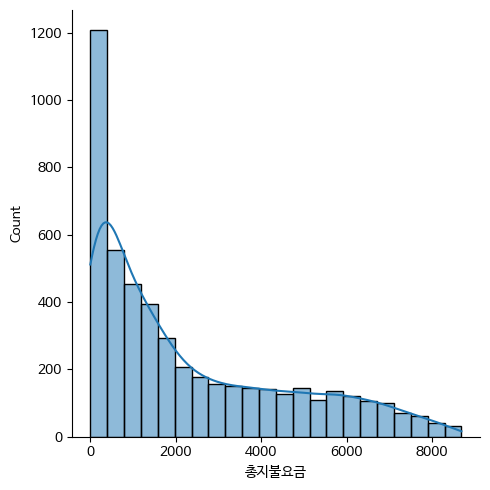

In [33]:
sns.displot(df["총지불요금"], kde=True)
plt.show()

### kdeplot

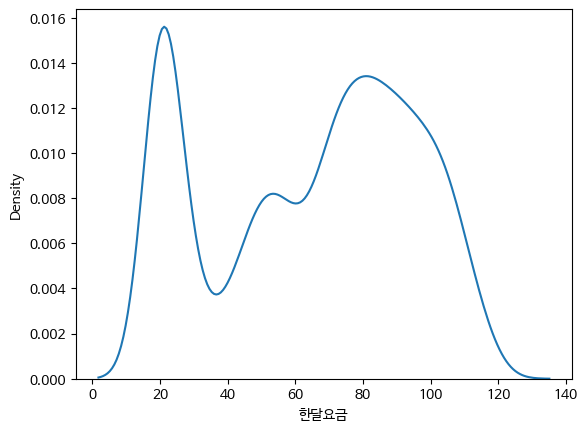

In [34]:
sns.kdeplot(df["한달요금"])
plt.show()

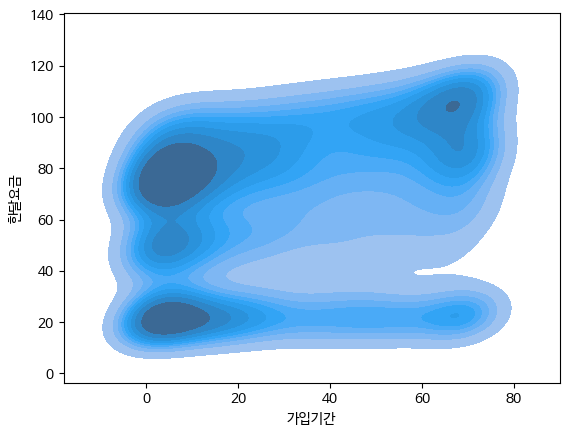

In [35]:
sns.kdeplot(x="가입기간", y="한달요금", data=df, fill= True)
plt.show()

## categorical plots

### countplot

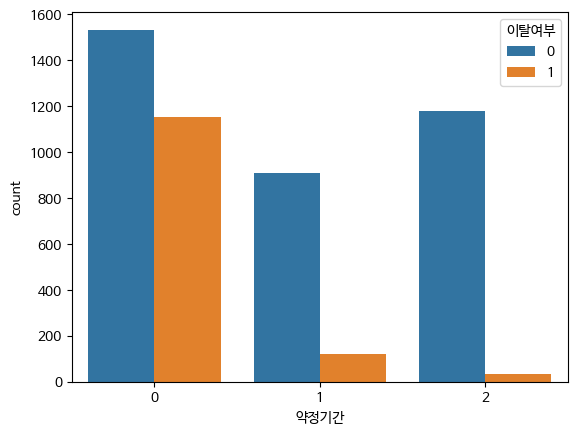

In [36]:
# 각 약정 기간에 대하여 이탈여부별 카운팅
sns.countplot(x="약정기간",hue="이탈여부", data=df)
plt.show()

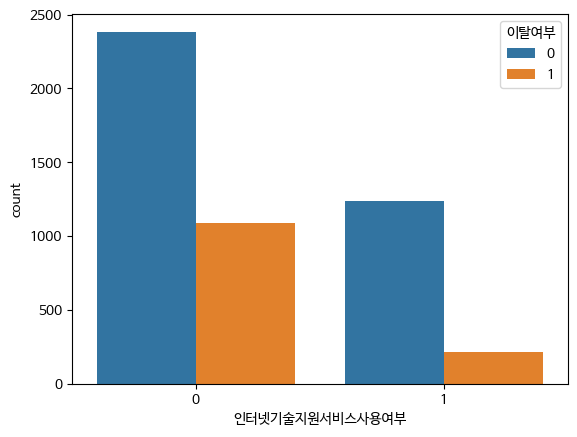

In [37]:
sns.countplot(x="인터넷기술지원서비스사용여부",hue="이탈여부", data=df)
plt.show()

### barplot
- x(범주형)에 대한 y(연속형)의 통계치를 bar 형태로 시각화
- 신뢰구간도 같이 표시

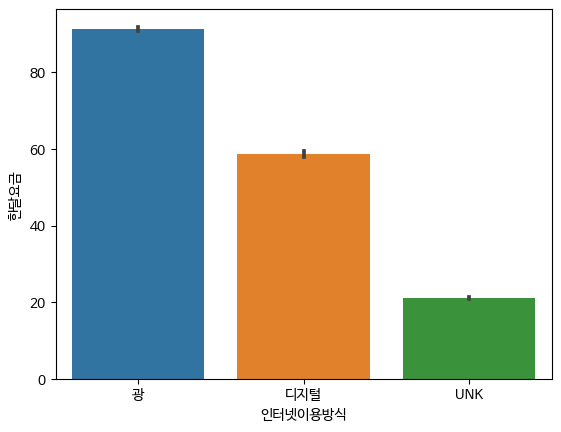

In [38]:
# 인터넷 이용방식 별 한달요금의 평균을 보고 싶다면?
sns.barplot(x="인터넷이용방식", y="한달요금", data=df)
plt.show()

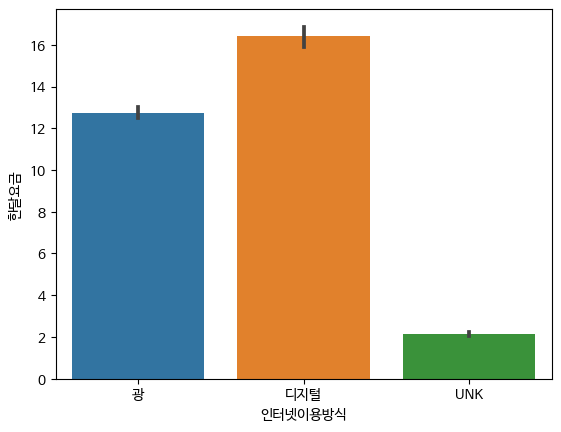

In [39]:
sns.barplot(x="인터넷이용방식", y="한달요금", data=df, estimator="std")
plt.show()

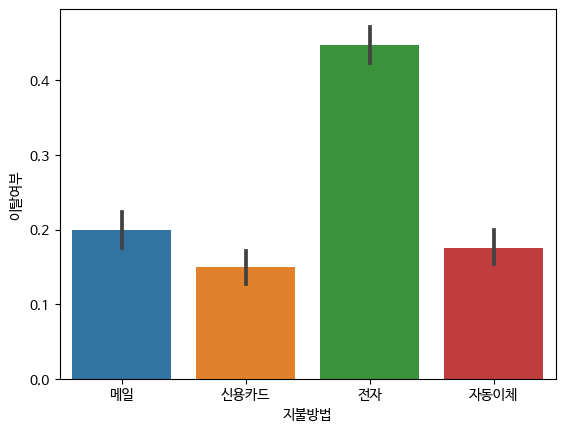

In [40]:
# 지불방법별 이탈비율을 시각화 하고 싶다면?

sns.barplot(x="지불방법", y="이탈여부", data=df)
plt.show()

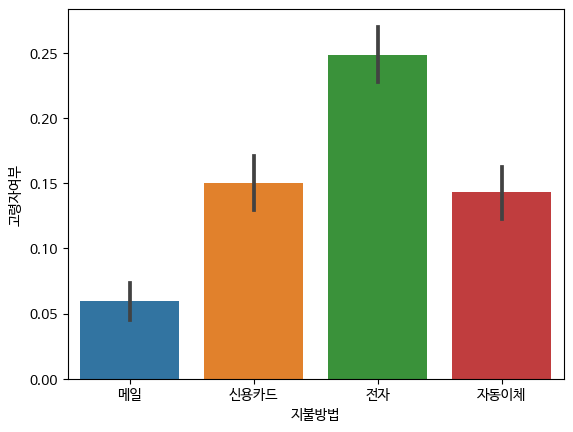

In [41]:
sns.barplot(x="지불방법", y="고령자여부", data=df)
plt.show()

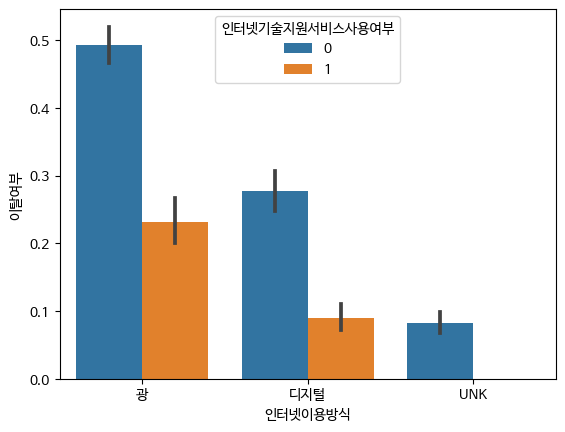

In [42]:
# 각 인터넷이용방식에서 인터넷기술지원서비스사용여부별 이탈 비율을 보고 싶다면?
sns.barplot(x="인터넷이용방식", hue="인터넷기술지원서비스사용여부" , y="이탈여부", data=df)
plt.show()

### boxplot

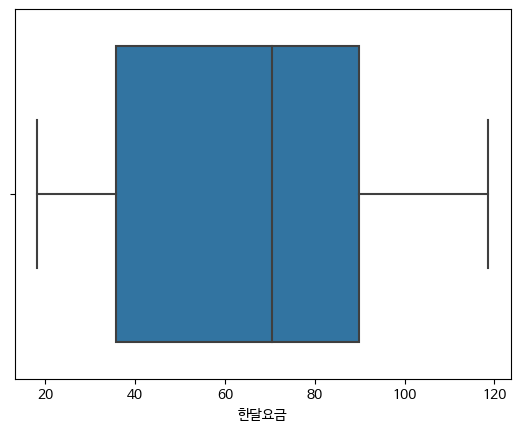

In [43]:
sns.boxplot(x="한달요금", data=df)
plt.show()

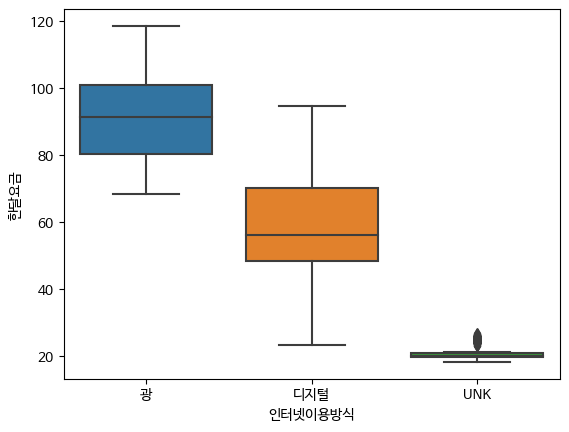

In [44]:
# 인터넷이용방식별 한달요금의 boxplot 보고 싶다면?
sns.boxplot(x="인터넷이용방식", y="한달요금", data=df)
plt.show()

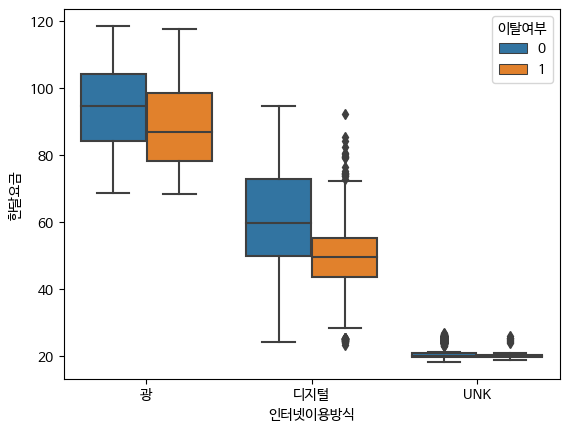

In [45]:
# 각 인터넷이용방식에서 이탈여부별 한달요금에 대한 boxplot 보고 싶다면?

sns.boxplot(x="인터넷이용방식", hue="이탈여부", y="한달요금", data=df)
plt.show()

### violinplot

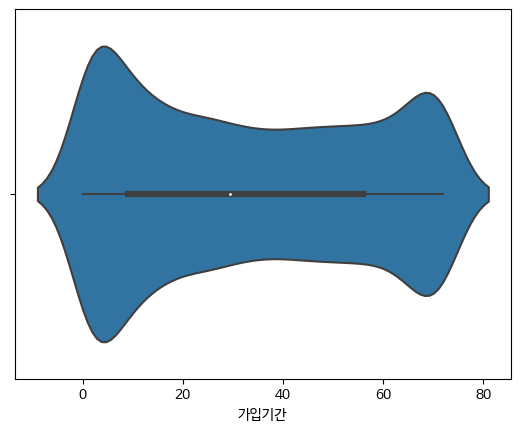

In [46]:
sns.violinplot(x="가입기간", data=df)
plt.show()

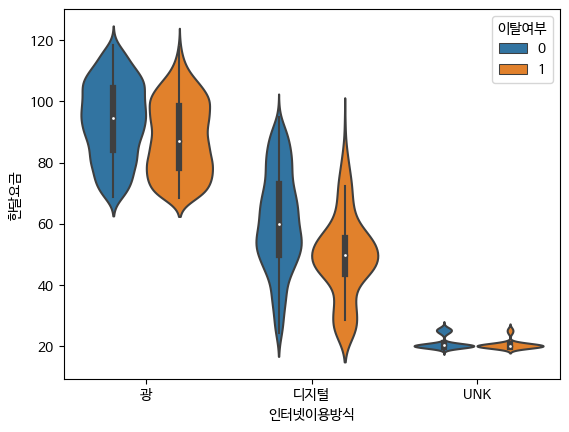

In [47]:
# 각 인터넷이용방식에서 이탈여부별 한달요금에 대한 violinplot 보고 싶다면?

sns.violinplot(x="인터넷이용방식", hue="이탈여부", y="한달요금", data=df)
plt.show()

# seaborn 그래프를 axes 여러개 그리기

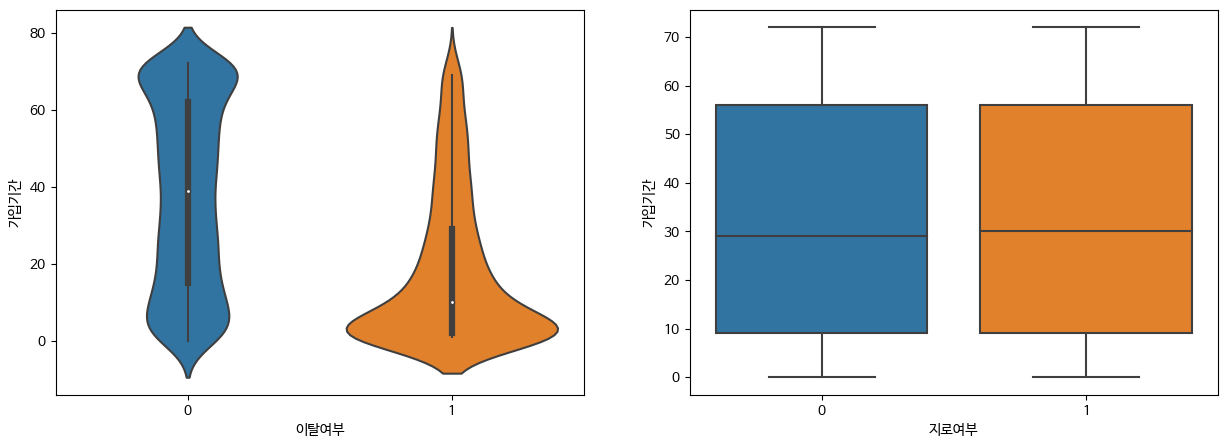

In [48]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
sns.violinplot( x="이탈여부", y="가입기간", data=df, ax=ax[0] ) # 이탈여부별 가입기간의 violinplot
sns.boxplot( x="지로여부", y="가입기간",data=df, ax=ax[1] ) # 지로여부별 가입기간의 boxplot
plt.show()